In [2]:
import os
%load_ext autoreload
%autoreload 2

""""
"""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'"\n'

# Load a dataset


To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper
DFallpa = load_handsaved_wrapper()

##### [Optionally, merge across events]

In [5]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,trial,03_samp,M1,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 424, 160)"
1,trial,03_samp,PMv,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(69, 424, 160)"
2,trial,03_samp,PMd,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(37, 424, 160)"
3,trial,03_samp,dlPFC,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(23, 424, 160)"
4,trial,03_samp,vlPFC,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(54, 424, 160)"
5,trial,03_samp,FP,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(35, 424, 160)"
6,trial,03_samp,SMA,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(53, 424, 160)"
7,trial,03_samp,preSMA,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(67, 424, 160)"
8,trial,05_first_raise,M1,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 424, 160)"
9,trial,05_first_raise,PMv,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(69, 424, 160)"


In [ ]:
from neuralmonkey.classes.population_mult import dfpa_group_and_split

DFallpa = dfpa_group_and_split(DFallpa, ["event"], concat_dim="trials")

In [ ]:
DFallpa

In [ ]:
pa = DFallpa["pa"].values[0]
pa.Xlabels["trials"]["event"].value_counts()
pa.plotNeurHeat(0)

##### Preprocess fr normalization?

In [6]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
dfallpa_preprocess_fr_normalization(DFallpa, "across_time_bins")

##### Inspect DFallpa

In [ ]:
DFallpa

In [ ]:
pa = DFallpa["pa"].values[0]
pa.Xlabels["trials"]["seqc_0_loc"][:2]

In [ ]:
[col for col in pa.Xlabels["trials"].columns if "seqc" in col]

##### To save

In [ ]:
# Save it
import pickle
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_char_trial_Pancho_230126.pkl"
# path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_tmp.pkl"
path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_{animal}_{date}_{question}.pkl"

with open(path, "wb") as f:
    pickle.dump(DFallpa, f)
print("Saved to:", path)

# Load a DFallpa

In [ ]:
# Char, 
# animal = "Pancho"
# date = 230126
# do_combine = True

# Single prim, novels
# animal = "Pancho"
# date = 230126
animal = "Diego"
date = 230817
# date = 230817
do_combine = False

if do_combine:
    # COMBINE trial and stroke
    dir_suffix = "test"
    question = None
    # q_params = None
    which_level = None
    q_params = {
        "effect_vars": ["seqc_0_shape", "seqc_0_loc"]
    }
    
    combine_trial_and_stroke = True
    
    # PIG
    # question_trial = "PIG_BASE_trial"
    # question_stroke = "PIG_BASE_stroke"
    # check_that_locs_match = True
    
    # CHAR
    question_trial = "CHAR_BASE_trial"
    question_stroke = "CHAR_BASE_stroke"
    check_that_locs_match = True
    check_that_shapes_match = True
else:
    # DONT COMBINE, use questions.
    # question = "CHAR_BASE_stroke"
    # question = "CHAR_BASE_trial"
    # question = "SP_shape_loc"
    question = "PIG_BASE_stroke"
    # question = "PIG_BASE_trial"
    combine_trial_and_stroke = False
    # which_level = "stroke" # Doesnt matter
    which_level = "stroke" # Doesnt matter
    dir_suffix = question

    # Load q_params
    from neuralmonkey.analyses.rsa import rsagood_questions_dict, rsagood_questions_params
    q_params = rsagood_questions_dict(animal, date, question)[question]

############### PARAMS
exclude_bad_areas = True
SPIKES_VERSION = "tdt" # since Snippets not yet extracted for ks
combine_into_larger_areas = False
HACK_RENAME_SHAPES = False
list_time_windows = [(-0.6, 0.6)]
events_keep = None
fr_normalization_method = "across_time_bins"
########################################## RUN

if combine_trial_and_stroke:
    from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper_combine_trial_strokes
    DFallpa = dfallpa_extraction_load_wrapper_combine_trial_strokes(animal, date, question_trial,
                                                                       question_stroke,
                                                list_time_windows, events_keep=events_keep,
                                               combine_into_larger_areas = combine_into_larger_areas,
                                               exclude_bad_areas=exclude_bad_areas,
                                                SPIKES_VERSION="tdt",
                                                HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                               fr_normalization_method=fr_normalization_method,
                                                    check_that_shapes_match=check_that_shapes_match,
                                                check_that_locs_match=check_that_locs_match)
else:
    from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
    DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
                                              which_level=which_level, events_keep=events_keep,
                                              combine_into_larger_areas = combine_into_larger_areas,
                                              exclude_bad_areas = exclude_bad_areas,
                                              SPIKES_VERSION = SPIKES_VERSION,
                                              HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                              fr_normalization_method=fr_normalization_method)

# Code example for benchmarking: decoding shapes

This step takes in a representation of neural data and outputs a scalar score for how well you can decode "shape" from that data

Here, this example is using the raw data (dimensionality = number of channels). The goal is to use methods to reduce the dimensionality of this data, each time running through this decoding benchmark, to compare the different methods

In [ ]:
pa = DFallpa["pa"].values[0]

In [ ]:
pa.Xlabels["trials"][:2].columns

In [ ]:
from pythonlib.tools.pandastools import grouping_count_n_samples, grouping_append_and_return_inner_items_good, grouping_print_n_samples

# grouping_print_n_samples(pa.Xlabels["trials"], ["epochset", "epoch", "syntax_concrete", "syntax_role", "chunk_rank", "chunk_within_rank", "stroke_index", "shape", "gridloc"])

grouping_print_n_samples(pa.Xlabels["trials"], ["epoch", "syntax_concrete", "syntax_role", "chunk_rank", "chunk_within_rank", "stroke_index", "shape", "gridloc", "gridloc_x", "gridloc_y"])

grouping_print_n_samples(pa.Xlabels["trials"], ["epoch", "syntax_concrete", "syntax_role", "chunk_rank", "chunk_within_rank", "stroke_index", "shape", "gridloc", "gridloc_x", "gridloc_y"])

##### First, pull out a specific PA. (just an example)

NOTE: tjhis is just for demonstration. Eventually you will want to loop thru all PA, scoring them all

In [ ]:
from neuralmonkey.classes.population_mult import extract_single_pa


## Make sure to normalize PA before running any modeling on it:

In [ ]:
# from neuralmonkey.classes.population_mult import po
path_to_save_example_fr_normalization = None
fr_normalization_method = "each_time_bin"

if fr_normalization_method is not None:
    if fr_normalization_method=="each_time_bin":
        # Then demean in each time bin indepednently
        subtract_mean_at_each_timepoint = True
        subtract_mean_across_time_and_trial = False
    elif fr_normalization_method=="across_time_bins":
        # ALl time bins subtract the same scalar --> maintains temporal moudlation.
        subtract_mean_at_each_timepoint = False
        subtract_mean_across_time_and_trial = True
    else:
        print(fr_normalization_method)
        assert False

    from neuralmonkey.analyses.state_space_good import popanal_preprocess_scalar_normalization
    list_panorm = []

    for i, pa in enumerate(DFallpa["pa"].tolist()):
        if path_to_save_example_fr_normalization is not None and i==0:
            plot_example_chan_number = pa.Chans[0]
            if which_level=="trial":
                plot_example_split_var_string = "seqc_0_shape"
            elif which_level=="stroke":
                plot_example_split_var_string = "shape"
            else:
                plot_example_split_var_string = q_params["effect_vars"][0]
        else:
            plot_example_chan_number = None
            plot_example_split_var_string = None
        PAnorm, PAscal, PAscalagg, fig, axes, groupdict = popanal_preprocess_scalar_normalization(pa, None,
                                                                                          DO_AGG_TRIALS=False,
                                                                                          plot_example_chan_number=plot_example_chan_number,
                                                                                            plot_example_split_var_string = plot_example_split_var_string,
                                                                                          subtract_mean_at_each_timepoint=subtract_mean_at_each_timepoint,
                                                                                          subtract_mean_across_time_and_trial=subtract_mean_across_time_and_trial)
        if path_to_save_example_fr_normalization is not None and i==0:
            savefig(fig, path_to_save_example_fr_normalization)
        list_panorm.append(PAnorm)
    DFallpa["pa"] = list_panorm


In [ ]:
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import os
SAVEDIR_ANALYSIS = f"{PATH_ANALYSIS_OUTCOMES}/recordings/main/DECODE"

In [ ]:
# Figure out how long is seuqence
n_strokes_max = -1
for i in range(2):
    n_ignore = sum(PAnorm.Xlabels["trials"][f"seqc_{i}_shape"]=="IGNORE")
    n_total = len(PAnorm.Xlabels["trials"][f"seqc_{i}_shape"])
    print(n_ignore, n_total)
    if n_ignore<n_total:
        n_strokes_max=i+1
assert n_strokes_max>0
print(n_strokes_max)

### Keep specific events

In [ ]:
DFallpa["event"].unique()
events_keep = ["03_samp", "04_go_cue"]
DFallpa = DFallpa[DFallpa["event"].isin(events_keep)].reset_index(drop=True)

# PREPROCESS - factorize all relevant labels FIRST here.


In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_vars_conjunctions_extract
dfallpa_preprocess_vars_conjunctions_extract(DFallpa, which_level=which_level)


In [ ]:
dflab = pa.Xlabels["trials"]
sorted([col for col in dflab.columns if "seqc_" in col])

In [ ]:
# Extract all 

In [ ]:
from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

### PRINT VARIABLES

In [ ]:
pa = DFallpa["pa"].values[0]
pa.Xlabels["trials"].loc[::10, ["epochset", "epoch"]]

In [ ]:
pa = DFallpa["pa"].values[0]
pa.Xlabels["trials"].loc[::10, ["epoch", "superv_is_seq_sup", "epoch_orig_rand_seq", "epoch_is_AnBmCk", "INSTRUCTION_COLOR"]]



In [ ]:

pathis = pa.slice_by_labels("trials", ("epoch_orig_rand_seq", "epoch_is_AnBmCk", "INSTRUCTION_COLOR"), [(True, False, True), (False, True, False)])

In [ ]:
from pythonlib.tools.pandastools import grouping_print_n_samples 

vars = ["epoch_orig", "epoch", "epoch_rand", "INSTRUCTION_COLOR", "superv_is_seq_sup", "epoch_orig_rand_seq", "epoch_is_AnBmCk"]
vars = ["epochset", "epoch_orig", "epoch", "epoch_rand", "INSTRUCTION_COLOR", "superv_is_seq_sup", "epoch_orig_rand_seq", "epoch_is_AnBmCk"]
# vars = ["epochset_diff_motor", "epoch_orig", "epoch", "epoch_rand", "INSTRUCTION_COLOR", "superv_is_seq_sup", "epoch_orig_rand_seq", "epoch_is_AnBmCk"]
grouping_print_n_samples(pa.Xlabels["trials"], vars)

# NEW MODULATION SCORE EUCLIDIAN

In [ ]:
SAVEDIR_ANALYSIS = "/tmp/ANBMCK_ENDPOINT_ALIGN"
import matplotlib.pyplot as plt
import os
import pandas as pd

In [ ]:
#### PARAMS specific to noteobok
# bregions_plot = ["M1_m", "PMd_p", "preSMA_p", "preSMA_a"]
# bregions_plot = ["M1_m", "preSMA_p"]
# bregions_plot = ["M1_m", "preSMA_p", "preSMA_a"]
# bregions_plot = ["M1_m", "PMd_p", "preSMA_a"]
# bregions_plot = ["PMd_a", "preSMA_a"]
# bregions_plot = ["M1_m", "PMd_p", "preSMA_p", "preSMA_a"]
# bregions_plot = ["M1_m", "preSMA_p", "preSMA_a"]
# bregions_plot = ["M1_m", "PMv_l", "PMd_p"]
# bregions_plot = ["M1_m", "PMd_p", "preSMA_p", "preSMA_a"]
bregions_plot = ["M1_m", "preSMA_p", "preSMA_a"]
# bregions_plot = ["preSMA_a"]
# bregions_plot = None
# bregions_plot = ["M1_m", "preSMA_a"]
NPCS_KEEP = 10

##### Get variables

In [ ]:
# Method 1 - saved
from neuralmonkey.metadat.analy.anova_params import params_getter_euclidian_vars

# question = "RULESW_ANBMCK_DIR_STROKE"

question = None
# question = "RULE_ANBMCK_STROKE"
# question = "SP_BASE_stroke"
LIST_VAR, LIST_VARS_OTHERS, LIST_CONTEXT, LIST_PRUNE_MIN_N_LEVS, LIST_FILTDICT = params_getter_euclidian_vars(question)

In [ ]:
LIST_VAR = [
    "chunk_within_rank_semantic_v3",
    "chunk_within_rank_semantic",
    "chunk_within_rank",
    "chunk_within_rank_fromlast",
]
# More restrictive
LIST_VARS_OTHERS = [
    ["chunk_rank", "shape", "chunk_n_in_chunk"],
    ["chunk_rank", "shape", "chunk_n_in_chunk"],
    ["chunk_rank", "shape", "chunk_n_in_chunk"],
    ["chunk_rank", "shape", "chunk_n_in_chunk"],
]

LIST_CONTEXT = [
    {"same":["chunk_rank", "shape"], "diff":["chunk_n_in_chunk"]},
    {"same":["chunk_rank", "shape"], "diff":["chunk_n_in_chunk"]},
    {"same":["chunk_rank", "shape"], "diff":["chunk_n_in_chunk"]},
    {"same":["chunk_rank", "shape"], "diff":["chunk_n_in_chunk"]},
    ]

LIST_PRUNE_MIN_N_LEVS = [2 for _ in range(len(LIST_VAR))]
# Use 1 for things that use syntax role as effect. or else will throw out cases with 1 item in given chunk.

# filtdict = {
#     # "stroke_index": list(range(1, 10, 1)), # [1, ..., ]
# }
# filtdict = {"task_kind":["character"]}
filtdict = None
LIST_FILTDICT = [
    filtdict for _ in range(len(LIST_VAR))
]


In [ ]:
# Give a new variable called chunk_within_rank_semantic_v2
def F(x):
    if x["chunk_within_rank_semantic"] in ["first", "last", "both_fl"]:
        # Return this
        return x["chunk_within_rank_semantic"]
    else:
        # Return the index from onset, as string
        return str(x["chunk_within_rank"])

# Create new variable, chunk_within_rank_semantic_v2
pa = DFallpa["pa"].values[0]
for i, row in DFallpa.iterrows(): 
    pa = row["pa"]
    from pythonlib.tools.pandastools import applyFunctionToAllRows
    pa.Xlabels["trials"] = applyFunctionToAllRows(pa.Xlabels["trials"], F, "chunk_within_rank_semantic_v2")
    


############## New variable: chunk_within_rank_semantic_v3
def F(x):
    if x["chunk_within_rank_semantic"] == "both_fl":
        # A unique state
        return -9
    elif x["chunk_within_rank_semantic"] == "first":
        # 
        return 0
    elif x["chunk_within_rank_semantic"] == "last":
        return 99
    elif x["chunk_within_rank"] == 1:
        # 2nd stroke wins 
        return 1
    elif x["chunk_within_rank_fromlast"] == -2:
        return 98
    else:
        # Middle strokes
        return 50

# Create new variable, chunk_within_rank_semantic_v2
pa = DFallpa["pa"].values[0]
for i, row in DFallpa.iterrows(): 
    pa = row["pa"]
    from pythonlib.tools.pandastools import applyFunctionToAllRows
    pa.Xlabels["trials"] = applyFunctionToAllRows(pa.Xlabels["trials"], F, "chunk_within_rank_semantic_v3")
    



In [ ]:
grouping_print_n_samples(pa.Xlabels["trials"], ["chunk_n_in_chunk", "chunk_within_rank", "chunk_within_rank_semantic_v3"])

In [ ]:
########################################
SHUFFLE = False

# ################# RUN

PLOT = False
PLOT_MASKS = False
nmin_trials_per_lev = 4
PLOT_STATE_SPACE = True
COMPUTE_EUCLIDIAN = True
# twind = (-0.1, 0.1)
twind = (-0.1, 0.2)
# twind = (0.05, 0.25)
tbin_dur = 0.1
tbin_slice = tbin_dur

from neuralmonkey.analyses.state_space_good import euclidian_distance_compute_scalar

######## DIM REDUCTIONS PARAMS
dim_red_method = "superv_dpca"
NPCS_KEEP = None

# --- Unsupervised
extra_dimred_method_n_components = 3 
umap_n_neighbors = 40

################## DIFFERENT DPCA PARAMS
LIST_SAVEDIR_SUFFIX = []
LIST_SUPERV_DPCA_PARAMS = []

# # (2) var rank, condition on each chunk one by one
# chunk_within_rank
savedir_suffix = f"chunk_within_rank_semantic_v3"
# (1) var rank, condition on everything else.
superv_dpca_params = {
    "superv_dpca_var":"chunk_within_rank_semantic_v3",
    "superv_dpca_vars_group":["epoch", "chunk_rank", "shape", "syntax_concrete", "gridloc"],
    "superv_dpca_filtdict":None
}
LIST_SAVEDIR_SUFFIX.append(savedir_suffix)
LIST_SUPERV_DPCA_PARAMS.append(superv_dpca_params)

################# RUN 
list_dfres = []
for savedir_suffix, superv_dpca_params in zip(LIST_SAVEDIR_SUFFIX, LIST_SUPERV_DPCA_PARAMS):
    for i, row in DFallpa.iterrows():
        br = row["bregion"]
        tw = row["twind"]
        ev = row["event"]
        PA = row["pa"]
        
        if bregions_plot is not None:
            if br not in bregions_plot:
                continue
    
        savedir = f"{SAVEDIR_ANALYSIS}/{br}-{dim_red_method}-{NPCS_KEEP}-{extra_dimred_method_n_components}-{umap_n_neighbors}-{savedir_suffix}"
        os.makedirs(savedir, exist_ok=True)
        
        dfres = euclidian_distance_compute_scalar(PA, LIST_VAR, LIST_VARS_OTHERS, PLOT, PLOT_MASKS,
                                   twind, tbin_dur, tbin_slice, savedir, 
                                           PLOT_STATE_SPACE=PLOT_STATE_SPACE, COMPUTE_EUCLIDIAN=COMPUTE_EUCLIDIAN,
                                           nmin_trials_per_lev=nmin_trials_per_lev, LIST_CONTEXT=LIST_CONTEXT,
                                           LIST_FILTDICT=LIST_FILTDICT, NPCS_KEEP=NPCS_KEEP, 
                                           umap_n_neighbors = umap_n_neighbors, LIST_PRUNE_MIN_N_LEVS=LIST_PRUNE_MIN_N_LEVS,
                                           dim_red_method=dim_red_method, extra_dimred_method_n_components=extra_dimred_method_n_components,
                                           superv_dpca_params=superv_dpca_params)
        
        plt.close("all")
        if dfres is not None and len(dfres)>0:
            dfres["bregion"] = br
            dfres["twind"] = [tw for _ in range(len(dfres))]
            dfres["event"] = ev
            dfres["savedir_suffix"] = savedir_suffix
    
            list_dfres.append(dfres)
DFRES = pd.concat(list_dfres).reset_index(drop=True)

##### Print summary of the distribution of result features

In [ ]:
SAVEDIR_ANALYSIS

### Make summary plots

In [ ]:
SAVEDIR

In [ ]:
SAVEDIR = f"/{SAVEDIR_ANALYSIS}/ENDDPOINTS-DO_DEMIXED=True"

In [ ]:
# suffix = "chunkwithin_vs_chunkrank_samesyntax_excludefirstlast_includeeven_ifone_lev"
# suffix = "chunkwithin_vs_chunkrank_anysyntax_excludefirstlast_includeeven_ifone_lev"
suffix = "ALL_DPCA_LOWD"
SAVEDIR = f"{SAVEDIR_ANALYSIS}/{suffix}"
import os
os.makedirs(SAVEDIR, exist_ok=True)

In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import plot_all_results

plot_all_results(DFRES, SAVEDIR)


In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import plot_all_results_yue
DFRES_PIVOT_YUE = plot_all_results_yue(DFRES, SAVEDIR)


In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import _plot_pairwise_btw_levels_for_seqsup, plot_pairwise_all_wrapper
# VERSION = "shape_vs_dir"
# plot_pairwise_btw_levels_for_seqsup(DFRES, SAVEDIR, VERSION)
plot_pairwise_all_wrapper(DFRES, SAVEDIR)

# DIM REDUCTION -- Quick scratch -- getting all the ways for dim reduction

In [ ]:
DFallpa

In [ ]:
pa = DFallpa["pa"].values[2]


In [ ]:
plot_pca_explained_var_path="/tmp/pcaexp.pdf"
plot_loadings_path = "/tmp/pcaload.pdf"

twind = (-0.1, 0.2)
tbin_dur = 0.1
tbin_slice = 0.1

pca_reduce = True
NPCS_KEEP = 6

extra_dimred_method = None
# extra_dimred_method = "mds"
umap_n_neighbors = 40
Xredu, PAredu, PAslice, pca, _ = pa.dataextract_state_space_decode_flex(twind, tbin_dur, tbin_slice, reshape_method="trials_x_chanstimes",
                                           pca_reduce=pca_reduce, plot_pca_explained_var_path=plot_pca_explained_var_path, plot_loadings_path=plot_loadings_path, npcs_keep_force=NPCS_KEEP,
                                          extra_dimred_method=extra_dimred_method, umap_n_neighbors = umap_n_neighbors)

In [ ]:
pa.data

# DIM REDUCTION - time series

##### [Devo] doing demixed pca for trajectories


In [ ]:
DFallpa


In [ ]:
PA = DFallpa["pa"].values[16]

In [ ]:
# plot_pca_explained_var_path=f"{savedir}/pcaexp.pdf"
# plot_loadings_path = f"{savedir}/pcaload.pdf"
# pca_reduce = True
# extra_dimred_method = None
# umap_n_neighbors = 40

savedirthis = f"/tmp/pca_construction"
os.makedirs(savedirthis, exist_ok=True)
# PLOT_STEPS = False

superv_dpca_var = "seqc_0_shape"
superv_dpca_vars_group = ["seqc_0_loc"]
twind = [-0.1, 0.3]
tbin_dur = 0.15
superv_dpca_filtdict = None
PLOT_STEPS = False
SANITY = False
reshape_method = "chans_x_trials_x_times"
nmin_trials_per_lev = 5
pca_tbin_slice = 0.05
Xredu, PAredu, _, _, pca = PA.dataextract_pca_demixed_subspace(
    superv_dpca_var, superv_dpca_vars_group, twind, tbin_dur, superv_dpca_filtdict, savedirthis,
    n_min_per_lev_lev_others=nmin_trials_per_lev, PLOT_STEPS=PLOT_STEPS, SANITY=SANITY,
    reshape_method = reshape_method, pca_tbin_slice=pca_tbin_slice)


In [ ]:


superv_dpca_var = "seqc_0_shape"
superv_dpca_vars_group = ["seqc_0_loc"]
twind_overall = [-0.15, 0.35]
tbin_dur = 0.15
tbin_slide = 0.05
superv_dpca_filtdict = None
PLOT_STEPS = False
SANITY = False
reshape_method = "chans_x_trials_x_times"
nmin_trials_per_lev = 5
pca_tbin_slice = 0.05
npcs_keep_force = None

if True:
    extra_dimred_method = "umap"
    extra_dimred_method_n_components = 2
    umap_n_neighbors = 40
    pca_reduce = True
else:
    extra_dimred_method = None
    pca_reduce = True

Xredu, PAredu, PAslice, pca, X_before_dimred = PA.dataextract_state_space_decode_flex(twind_overall=twind_overall, 
                                                                                      tbin_dur=tbin_dur, tbin_slide=tbin_slide,
                                            reshape_method = "chans_x_trials_x_times",
                                            pca_reduce=pca_reduce,
                                            pca_method="svd",
                                            norm_subtract_single_mean_each_chan=True,
                                            npcs_keep_force=npcs_keep_force,
                                            extra_dimred_method=extra_dimred_method,
                                            extra_dimred_method_n_components=extra_dimred_method_n_components, 
                                            umap_n_neighbors = umap_n_neighbors)


In [ ]:
np.all(X==Xold)

In [ ]:
Xold = X.copy()

### [Devo] State space plots showing individual trials, colored by continuous variable

In [8]:
PA = DFallpa["pa"].values[1]

In [14]:
PA = PA.norm_subtract_trial_mean_each_timepoint()

Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


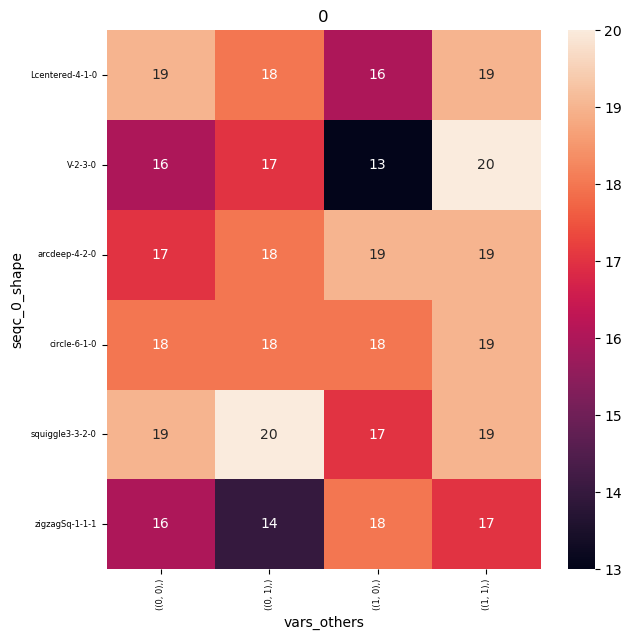

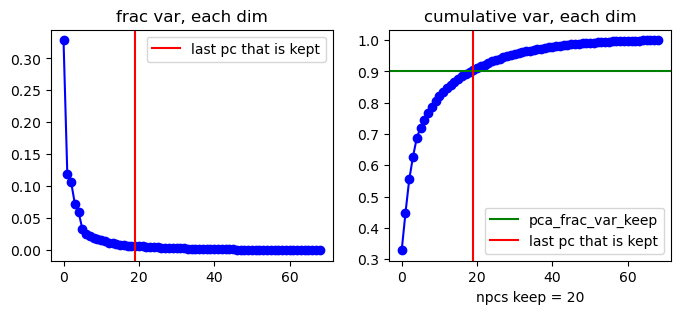

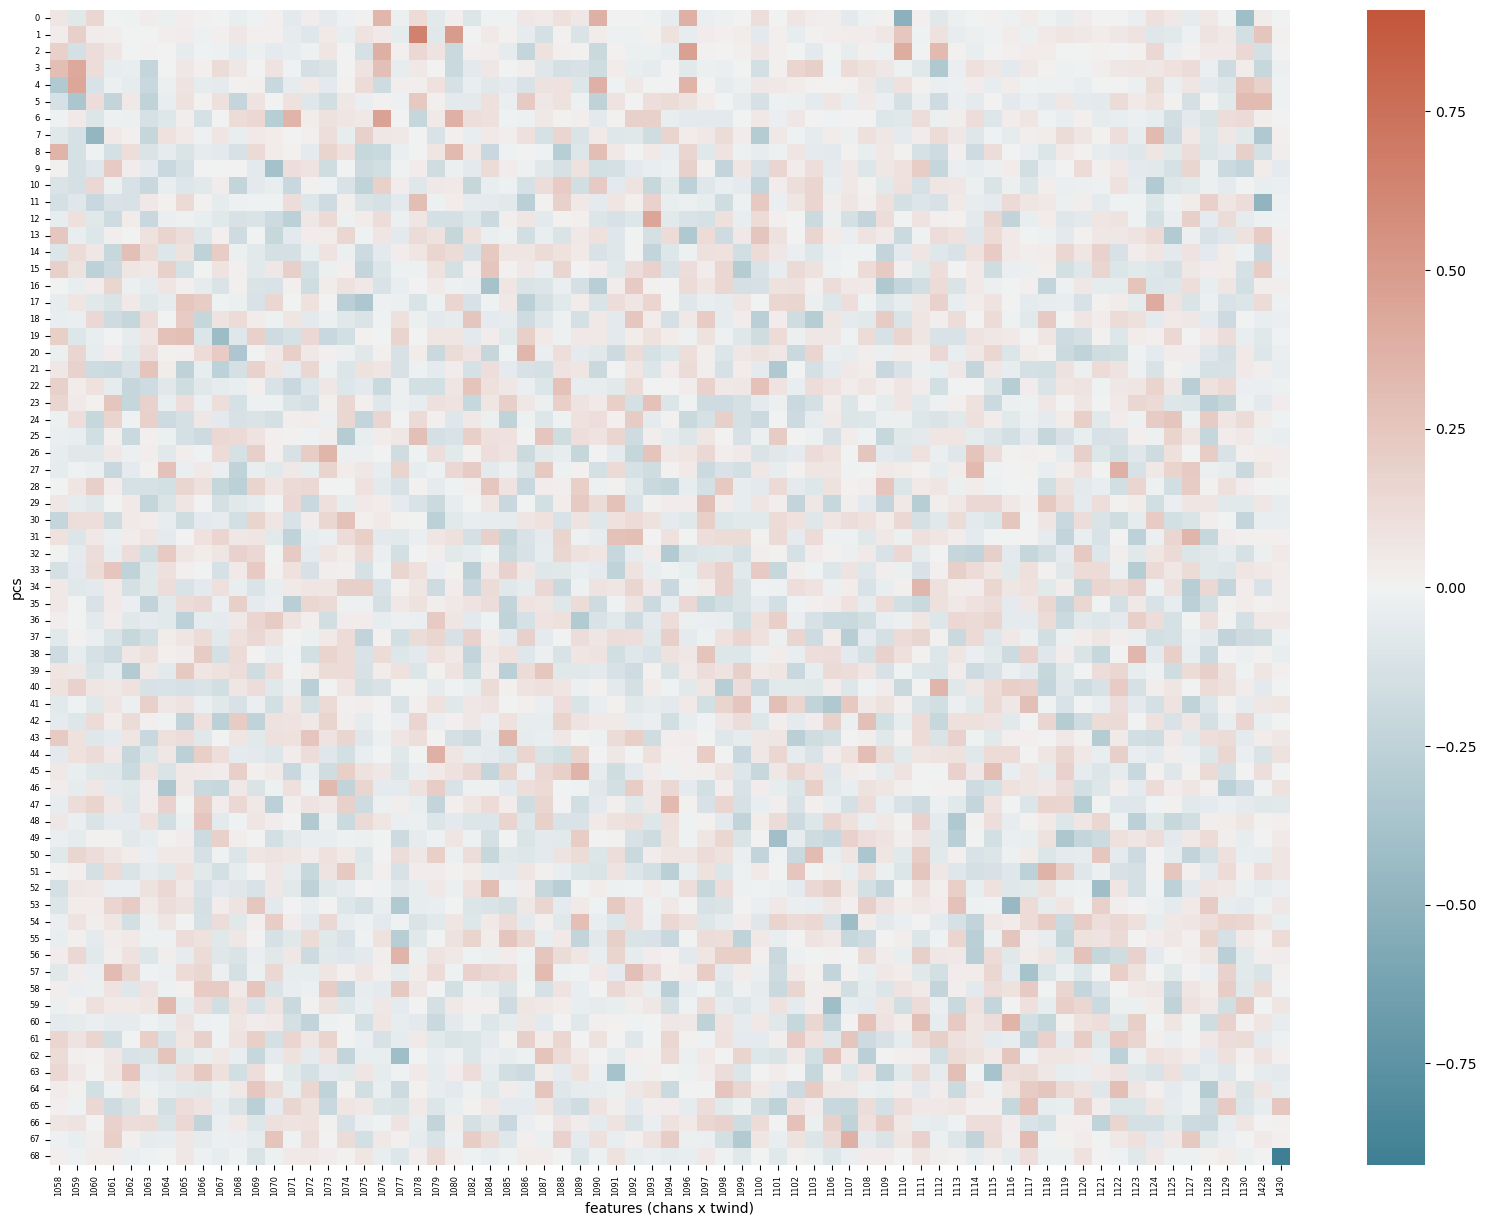

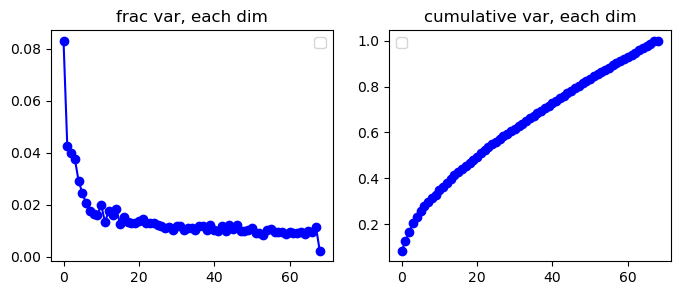

In [105]:
# Do dim reduction


# superv_dpca_var = "seqc_0_shape"
# superv_dpca_vars_group = ["seqc_0_loc"]
# twind_overall = [-0.2, 0.5]
# tbin_dur = 0.1
# tbin_slide = 0.05


# reshape_method = "chans_x_trials_x_times"
# nmin_trials_per_lev = 5
# pca_tbin_slice = 0.05
# npcs_keep_force = 6


superv_dpca_var = "seqc_0_shape"
superv_dpca_vars_group = ["seqc_0_loc"]
twind = [-0.2, 0.5]
tbin_dur = 0.2
superv_dpca_filtdict = None
PLOT_STEPS = False
SANITY = False
reshape_method = "chans_x_trials_x_times"
nmin_trials_per_lev = 5
pca_tbin_slice = 0.02
savedirthis="/tmp"
Xredu, PAredu, _, _, pca = PA.dataextract_pca_demixed_subspace(
    superv_dpca_var, superv_dpca_vars_group, twind, tbin_dur, superv_dpca_filtdict, savedirthis,
    n_min_per_lev_lev_others=nmin_trials_per_lev, PLOT_STEPS=PLOT_STEPS, SANITY=SANITY,
    reshape_method = reshape_method, pca_tbin_slice=pca_tbin_slice)


In [106]:
# To plot all on same plot, but color by shape...
if False:
    pa = PAredu.copy()
    grp = ["seqc_0_shape", "seqc_0_loc"]
    pa = pa.slice_and_agg_wrapper("trials", grp)
else:
    pa = PAredu.copy()

In [107]:
pa

In [120]:
from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_WRAPPER

X = pa.X
times = pa.Times
dflab = pa.Xlabels["trials"]

# var_color = "seqc_0_shape"
# vars_subplot = None
var_color = "seqc_0_shape"
vars_subplot = ["seqc_0_loc"]

savedir = "/tmp/DEVO_STATE_SPACE_PLOTS"
os.makedirs(savedir, exist_ok=True)
list_dims = [(0,1)]
time_bin_size = None
mean_over_trials = False
plot_dots_on_traj = False
for xlim_force in [
    [-3, 3],
    [-2.5, 2.5],
    ]:
    for ylim_force in [
        [-1.5, 1.5],
        [-2, 2],
        [-2.5, 2.5],
    ]:
        trajgood_plot_colorby_splotby_WRAPPER(X, times, dflab, var_color, savedir,
                                                        vars_subplot, list_dims,
                                                        time_bin_size, alpha=0.7,
                                                        mean_over_trials=True, plot_dots_on_traj=plot_dots_on_traj,
                                                        xlim_force = xlim_force, ylim_force=ylim_force,
                                                        save_suffix=f"{xlim_force}|{ylim_force}")




Saving ...  /tmp/DEVO_STATE_SPACE_PLOTS/color=seqc_0_shape-sub=['seqc_0_loc']-dims=(0, 1)-suff=[-3, 3]|[-1.5, 1.5].pdf
Saving ...  /tmp/DEVO_STATE_SPACE_PLOTS/color=seqc_0_shape-sub=['seqc_0_loc']-dims=(0, 1)-suff=[-3, 3]|[-2, 2].pdf
Saving ...  /tmp/DEVO_STATE_SPACE_PLOTS/color=seqc_0_shape-sub=['seqc_0_loc']-dims=(0, 1)-suff=[-3, 3]|[-2.5, 2.5].pdf
Saving ...  /tmp/DEVO_STATE_SPACE_PLOTS/color=seqc_0_shape-sub=['seqc_0_loc']-dims=(0, 1)-suff=[-2.5, 2.5]|[-1.5, 1.5].pdf
Saving ...  /tmp/DEVO_STATE_SPACE_PLOTS/color=seqc_0_shape-sub=['seqc_0_loc']-dims=(0, 1)-suff=[-2.5, 2.5]|[-2, 2].pdf
Saving ...  /tmp/DEVO_STATE_SPACE_PLOTS/color=seqc_0_shape-sub=['seqc_0_loc']-dims=(0, 1)-suff=[-2.5, 2.5]|[-2.5, 2.5].pdf


In [ ]:
# Also plot scalar, taking mean over 

In [ ]:
dfthis[var_color]

In [ ]:

from pythonlib.tools.plottools import map_continuous_var_to_color_range
from math import pi
from pythonlib.tools.listtools import sort_mixed_type
from pythonlib.tools.pandastools import append_col_with_grp_index
import numpy as np

var_color_by = "seqc_0_angle"
vars_subplot = ["seqc_0_shape"]
# vars_subplot = None
savedir = "/tmp/TESTMOTOR"


valmin = 0.
valmax = 2 *pi
kind = "circular"
ntrials = 50

var_color_for_name = var_color_by
if isinstance(var_color_by, (tuple, list)):
    dflab = append_col_with_grp_index(dflab, var_color_by, "_tmp")
    var_color_by = "_tmp"

var_color_for_name_subplots = vars_subplot
if vars_subplot is None:
    dflab["_tmp2"] = "dummy"
    vars_subplot = "_tmp2"
if isinstance(vars_subplot, (tuple, list)):
    dflab = append_col_with_grp_index(dflab, vars_subplot, "_tmp2")
    vars_subplot = "_tmp2"


dims = (0,1)

levs_other = sort_mixed_type(dflab[vars_subplot].unique().tolist())
ncols = 3
nrows = int(np.ceil(len(levs_other)/ncols))
fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(ncols*3.5, nrows*3.5))

for ax, levo in zip(axes.flatten(), levs_other):
    ax.set_title(levo)
    dfthis = dflab[dflab[vars_subplot]==levo]
    
    # get neural and label colors
    inds = dfthis.index.tolist()
    Xthis = X[:, inds, :]
    label_colors = map_continuous_var_to_color_range(dfthis[var_color_by], valmin, valmax, kind)
    
    # Take subset of trials
    import random
    if Xthis.shape[1]>ntrials:
        _inds = random.sample(range(Xthis.shape[1]), ntrials)
        Xthis = Xthis[:, _inds, :]
        label_colors = label_colors[_inds]

    # Plot each trajectory
    ntrials = Xthis.shape[1]
    for tr in range(ntrials):
        col = label_colors[tr, :]
        x = Xthis[dims[0], tr, :]
        y = Xthis[dims[1], tr, :]
        ax.plot(x, y, "-", color=col, alpha=0.25)
        ax.plot(x[0], y[0], "o", color=col, alpha=0.25)

        

##### [Analysis] --> General, euclidian distance, but using trajectory distances
(NOTE: moved to script already)

In [ ]:
DFallpa

In [ ]:
PA = DFallpa["pa"].values[2]

In [ ]:
import os
SAVEDIR = "/tmp/TEST_CHAR_DPCA_on_sp_FIRSTSTROKE__tdt_combined_GOOD"
os.makedirs(SAVEDIR, exist_ok=True)

In [ ]:
# var_effect = "shape"
# vars_others = ["gridloc"]

# SINGLE PRIMS
# if False:
#     # - Strokes
#     twind = (-0.25, 0.35)
#     tbin_dur = 0.1
#     tbin_slice = 0.05
#     LIST_VAR_VAR_OTHERS = [
#         ["shape", ["gridloc"]],
#     ]
#     event_keep ="00_stroke"
# else:
#     # - Trials
#     twind = (0.1, 0.5)
#     tbin_dur = 0.1
#     tbin_slice = 0.05
#     LIST_VAR_VAR_OTHERS = [
#         ["seqc_0_shape", ["seqc_0_loc"]],
#     ]
#     event_keep ="03_samp"
# LIST_VAR = [
#     "seqc_0_shape",
# ]
# LIST_VARS_OTHERS = [
#     ["seqc_0_loc"],
# ]

# PIG (generalization of shape across task_kind)
# - Trials
# twind = (-0.25, 0.35)
# twind = (-0.25, 0.25)
# twind = (-0.4, 0.4)
twind = (-0.05, 0.35)
tbin_dur = 0.1
tbin_slice = 0.05
event_keep ="00_stroke"

LIST_VAR = [
    "shape_semantic",
    "shape_semantic",
]
LIST_VARS_OTHERS = [
    ["task_kind", "stroke_index"],
    ["task_kind"],
]
LIST_CONTEXT = [
    {"same":["stroke_index"], "diff":["task_kind"]},
    {"same":[], "diff":["task_kind"]}
]

# [Optional, for char] Keep only shapes that exist in every context
from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars_helper
dflab = DFallpa["pa"].values[0].Xlabels["trials"]
dflabthis = dflab[dflab["task_kind"].isin(["character", "prims_single"])].reset_index(drop=True)
_, dict_dfthis = extract_with_levels_of_conjunction_vars_helper(dflabthis,
                                               "task_kind", ["shape_semantic"], n_min_per_lev=3,
                                               plot_counts_heatmap_savepath="/tmp/test.png")
shapes_keep = dict_dfthis.keys()
shapes_keep = [x[0] for x in list(dict_dfthis.keys())]

LIST_FILTDICT = [
    {"task_kind":["prims_single", "character"], "shape_semantic":shapes_keep, "stroke_index":[0]},
    {"task_kind":["prims_single", "character"], "shape_semantic":shapes_keep}
]

LIST_PRUNE_MIN_N_LEVS=[2, 2]

NPCS_KEEP = 4
PLOT_TRAJS = True
PLOT_HEATMAPS = False
nmin_trials_per_lev = 3


In [ ]:
# list_bregions = ["M1_l", "M1_m", "PMv_l", "PMv_m", "vlPFC_a", "preSMA_p", "preSMA_a"]
list_bregions = ["M1", "PMv","preSMA", "PMd"]

In [ ]:
from pythonlib.tools.pandastools import extract_with_levels_of_var_good


In [ ]:
### Original version
from neuralmonkey.analyses.state_space_good import euclidian_distance_compute_trajectories

# Iterate over all locations from single prim data. For each, construct a DPCA space
# and run entire pipeline
list_dfres = []

if False:
    dim_red_method = "pca"
    superv_dpca_params=None
elif False:
    # Construct dPC space using SP
    dim_red_method = "superv_dpca"
    superv_dpca_params={
        "superv_dpca_var":"shape",
        "superv_dpca_vars_group":["gridloc"],
        "superv_dpca_filtdict":{"task_kind":["prims_single"]}
    }
else:
    # Char  
    dim_red_method = "superv_dpca"
    superv_dpca_params={
        "superv_dpca_var":"shape_semantic",
        "superv_dpca_vars_group":["task_kind"],
        "superv_dpca_filtdict":{"task_kind":["prims_single"]}
    }


for _, row in DFallpa.iterrows():
    ##############################
    # Pull ou# t a specific area
    PA = row["pa"].copy()
    br = row["bregion"]
    tw = row["twind"]
    ev = row["event"]
    print(br)

    if br not in list_bregions:
        continue
    
    if PA.X.shape[0]<NPCS_KEEP:
        continue

    savedirthis = f"{SAVEDIR}/{dim_red_method}/{br}-{ev}"
    os.makedirs(savedirthis, exist_ok=True)
    dfres = euclidian_distance_compute_trajectories(PA, LIST_VAR, LIST_VARS_OTHERS, twind, tbin_dur,
                            tbin_slice, savedirthis, PLOT_TRAJS=PLOT_TRAJS, PLOT_HEATMAPS=PLOT_HEATMAPS,
                            nmin_trials_per_lev=nmin_trials_per_lev,
                            LIST_CONTEXT=LIST_CONTEXT, LIST_FILTDICT=LIST_FILTDICT,
                            LIST_PRUNE_MIN_N_LEVS=LIST_PRUNE_MIN_N_LEVS,
                            NPCS_KEEP=NPCS_KEEP,
                            dim_red_method = dim_red_method, superv_dpca_params=superv_dpca_params)
    dfres["bregion"] = br
    dfres["twind"] = [tw for _ in range(len(dfres))]
    
    # Track what the dpca space was

    list_dfres.append(dfres)

DFRES = pd.concat(list_dfres).reset_index(drop=True)
DFRES        

In [ ]:
tbin_dur = 0.1
tbin_slide = 0.05
X, PAfinal, PAslice, pca, X_before_dimred = PA.dataextract_state_space_decode_flex(tbin_dur=tbin_dur, tbin_slide=tbin_slide)

In [ ]:

from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby_timeseries

var_color = "shape_semantic"
var_subplots = ["task_kind", "stroke_index"]

df = trajgood_construct_df_from_raw(PAfinal.X, PAfinal.Times, PAfinal.Xlabels["trials"], [var_color] + var_subplots)


In [ ]:

trajgood_plot_colorby_splotby_timeseries(df, var_color, vars_subplots, plot_trials_n=4,
                                         plot_trials=False,
                                         SUBPLOT_OPTION="combine_levs");
# trajgood_plot_colorby_splotby_timeseries(df, var_color, vars_subplots, plot_trials_n=4,
#                                          SUBPLOT_OPTION="split_levs");

##### [Analysis] Euclidian distance, comparing across time bins and events [NOT YET MOVED TO SCRIPT]

# ANALYSIS - compare representations across-time (generalization)

### ANALYSIS - compare RSA sim mats across time and event (Already moved to script, *timedistmat*)



In [ ]:
from neuralmonkey.analyses.state_space_good import euclidian_distance_compute_trajectories_timedistmat

In [ ]:
SAVEDIR_ANALYSIS = "/tmp/RSA_over_time-Diego_230618"

In [ ]:
# var_effect = "shape"
# vars_others = ["gridloc"]

if False:
    # - Strokes
    twind = (-0.25, 0.35)
    tbin_dur = 0.1
    tbin_slice = 0.05
    LIST_VAR_VAR_OTHERS = [
        ["shape", ["gridloc"]],
    ]
    event_keep ="00_stroke"
else:
    # - Trials
    # twind = (0.1, 0.5)
    twind = (-0.5, 0.5)
    tbin_dur = 0.2
    tbin_slice = 0.05
    LIST_VAR_VAR_OTHERS = [
        ["seqc_0_shape", ["seqc_0_loc"]],
    ]
    event_keep ="03_samp"



NPCS_KEEP = 5
PLOT_TRAJS = False

version_distance = "euclidian_unbiased"
dat_level = "distr"
PLOT_HEATMAPS = False

# version_distance = "euclidian"
# dat_level = "pts"
# PLOT_HEATMAPS = False
# PLOT_MASKS = False

LIST_RES = []


var = "seqc_0_shape"
var_others = ["seqc_0_loc"]

list_dfres = []
for _, row in DFallpa.iterrows():

    ##############################
    # Pull ou# t a specific area
    PA = row["pa"].copy()
    bregion = row["bregion"]
    tw = row["twind"]
    event = row["event"]

    print(bregion)


    savedir = f"{SAVEDIR_ANALYSIS}/PCA_time/{bregion}-ev={event}"
    os.makedirs(savedir, exist_ok=True)

    dfres = euclidian_distance_compute_trajectories_timedistmat(PA, var, var_others, 
                                        twind, tbin_dur, tbin_slice, savedir, 
                                        context=None, filtdict=None,
                                        PLOT_TRAJS=PLOT_TRAJS, nmin_trials_per_lev=None,
                                        NPCS_KEEP=NPCS_KEEP,
                                        dim_red_method = "pca", superv_dpca_params=None)

    dfres["bregion"] = bregion
    dfres["twind"] = [tw for _ in range(len(dfres))]
    dfres["event"] = event

    list_dfres.append(dfres)
DFRES = pd.concat(list_dfres)


In [ ]:
DFRES = pd.concat(list_dfres)

##### Plot all the distance matrices over time.

In [ ]:
from neuralmonkey.analyses.state_space_good import euclidian_distance_plot_timedistmat_heatmaps
euclidian_distance_plot_timedistmat_heatmaps(DFRES, "/tmp/TEST", sort_order=(0, 1))

##### Iter over all pairs of Cldist and get correlation score

In [ ]:
from neuralmonkey.analyses.state_space_good import euclidian_distance_plot_timedistmat_score_similarity
SAVEDIR_PLOTS="/tmp/thisplots"
os.makedirs(SAVEDIR_PLOTS, exist_ok=True)
vars_others = ["seqc_0_loc"]
dfres_corrs_btw_distmats = euclidian_distance_plot_timedistmat_score_similarity(DFRES, vars_others,
                                                                                DO_PLOTS=True, 
                                                                                SAVEDIR_PLOTS=SAVEDIR_PLOTS)
dfres_corrs_btw_distmats

# [SYNTAX] COMPARING ENDPOINT REPRESENTATIONS

##### Get dim reduced data, just for testing plots

In [ ]:
from neuralmonkey.analyses.state_space_good import euclidian_distance_compute_AnBmCk_endpoint
euclidian_distance_compute_AnBmCk_endpoint(PAredu, "/tmp")

##### Quantifying, euclidian distnace

In [ ]:
DFallpa

In [ ]:
idx = 14
PA = DFallpa["pa"].values[idx].copy()
bregion = DFallpa["bregion"].values[idx]


SAVEDIR = f"/tmp/ENDDPOINTS-DO_DEMIXED={DO_DEMIXED}/{bregion}"
import os
os.makedirs(SAVEDIR, exist_ok=True)

twind = (-0.1, 0.2)
tbin_dur = 0.1
tbin_slice = 0.1
if DO_DEMIXED:
    vars_subract_mean = ["epoch", "chunk_rank", "shape", "syntax_concrete", "gridloc"]
    var_pca = "chunk_within_rank_semantic_v2"
    filtdict = None
    
    savedir = f"{SAVEDIR}/test_gridloc"
    os.makedirs(savedir, exist_ok=True)
    PLOT_STEPS = False
    Xredu, PAredu, stats_redu, Xfinal_before_redu, pca = PA.dataextract_pca_demixed_subspace(var_pca, vars_subract_mean,
                                               twind, tbin_dur, filtdict, savedir,
                                                PLOT_STEPS=PLOT_STEPS)
else:
    # Just PCA
    plot_pca_explained_var_path=f"{SAVEDIR}/pcaexp.pdf"
    plot_loadings_path = f"{SAVEDIR}/pcaload.pdf"
    
    
    pca_reduce = True
    NPCS_KEEP = 10
    extra_dimred_method = None
    umap_n_neighbors = 40
    Xredu, PAredu, PAslice, pca, _ = PA.dataextract_state_space_decode_flex(twind, tbin_dur, tbin_slice, reshape_method="trials_x_chanstimes",
                                               pca_reduce=pca_reduce, plot_pca_explained_var_path=plot_pca_explained_var_path, plot_loadings_path=plot_loadings_path, npcs_keep_force=NPCS_KEEP,
                                              extra_dimred_method=extra_dimred_method, umap_n_neighbors = umap_n_neighbors)    
dflab = PAredu.Xlabels["trials"]

### Compute euclidian distances in this space

In [ ]:
# H1: first and last anchored. in between interpolates.
# H2: 

In [ ]:
PAredu.Xlabels["trials"]["chunk_within_rank_semantic_v2"].value_counts()

In [ ]:
##### Quantify similarity between states (euclidian distance)
var = "chunk_within_rank_semantic_v2"
var_others = ["chunk_rank", "shape", "chunk_n_in_chunk"]
context = {"same":["chunk_rank", "shape"], "diff":["chunk_n_in_chunk"]}
from neuralmonkey.analyses.state_space_good import euclidian_distance_compute_scalar_single
PLOT_RSA_HEATMAP = False
PLOT_MASKS = False
version_distance="euclidian_unbiased"

res = euclidian_distance_compute_scalar_single(PAredu, var, var_others, PLOT_RSA_HEATMAP, PLOT_MASKS,
                                              version_distance=version_distance, context_input=context)
DFRES = pd.DataFrame(res)


In [ ]:
PA

In [ ]:
DFRES["index_var"] = 0
DFRES["bregion"] = bregion

In [ ]:
# Summarize the contrasts that exist
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(DFRES, ["index_var", "var", "var_others", "dat_level", "effect_samediff", "context_samediff"])

In [ ]:

from neuralmonkey.scripts.analy_euclidian_dist_pop_script import plot_all_results, compute_normalized_distances, compute_all_derived_metrics

DFRES, _ = compute_normalized_distances(DFRES)
SAVEDIR = "/tmp"
plot_all_results(DFRES, SAVEDIR)



In [ ]:
from pythonlib.tools.pandastools import append_col_with_grp_index
# DFRES = append_col_with_grp_index(DFRES, ["index_var_str", "var", "var_others"], "var_var_others")
DFRES = append_col_with_grp_index(DFRES, ["effect_samediff", "context_samediff"], "effect_context")


In [ ]:
DFRES

In [ ]:
import seaborn as sns
sns.catplot(data=DFRES, x="effect_context", y="dist", hue="dat_level")

In [ ]:
import seaborn as sns
sns.catplot(data=DFRES, x="bregion", y="dist", hue="effect_context", kind="bar", row="dat_level")


### 3D plots

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_WRAPPER, trajgood_plot_colorby_splotby_scalar_WRAPPER

# trajgood_plot_colorby_splotby_WRAPPER(Xredu)
dflab = PAfinal.Xlabels["trials"]
var_color = "chunk_within_rank_semantic"
savedir = "/tmp"
vars_subplot = ["chunk_rank"]
plot_3D = True
overlay_mean = False
overlay_mean_var_color="shape"
connect_means_with_line=False
connect_means_with_line_levels=sorted(dflab[var_color].unique())
list_dims = [(0,1), (1,2)]
alpha=0.35
trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, var_color, savedir, vars_subplot, plot_3D=plot_3D,
                                             list_dims=list_dims, alpha=alpha,
                                     overlay_mean=overlay_mean, overlay_mean_var_color=overlay_mean_var_color,
                                             connect_means_with_line=connect_means_with_line, connect_means_with_line_levels=connect_means_with_line_levels)

### METHOD -- Subspace ID

In [ ]:
DFallpa
# PARAMS

PA = DFallpa["pa"].values[14].copy()

vars_subract_mean = ["epoch", "chunk_rank", "syntax_concrete", "shape"]
var_pca = "chunk_within_rank_semantic_v2"
filtdict = None

# var_pca = "shape"
# # vars_subract_mean = ["epoch", "stroke_index_is_first", "gridloc", "stroke_index"]
# vars_subract_mean = ["task_kind", "gridloc", "stroke_index"]
# # filtdict= None
# filtdict = {"task_kind":["prims_single"], "gridloc":[(-1,0)]}

# var_pca = "gridloc"
# # vars_subract_mean = ["epoch", "stroke_index_is_first", "gridloc", "stroke_index"]
# vars_subract_mean = ["task_kind", "shape", "stroke_index"]
# filtdict= None
# # filtdict = {"task_kind":["prims_single"], "gridloc":[(-1,0)]}
# 
# var_pca = "gridloc"
# # vars_subract_mean = ["epoch", "stroke_index_is_first", "gridloc", "stroke_index"]
# vars_subract_mean = ["epoch"]
# filtdict= None
# # filtdict = {"task_kind":["prims_single"], "gridloc":[(-1,0)]}

# var_pca = "stroke_index"
# vars_subract_mean = ["task_kind", "gridloc", "shape"]
# filtdict= None


twind = (-0.1, 0.2)
tbin_dur = 0.1
savedir = "/tmp/test_gridloc"
os.makedirs(savedir, exist_ok=True)
PLOT_STEPS = False
Xredu, PAredu, stats_redu, Xfinal_before_redu, pca = PA.dataextract_pca_demixed_subspace(var_pca, vars_subract_mean,
                                           twind, tbin_dur, filtdict, savedir,
                                            PLOT_STEPS=PLOT_STEPS)


In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_WRAPPER

In [ ]:
# Plot raw data in PCs
list_dims = [(0,1), (2,3)]
savedirthis = f"{savedir}"

save_suffix = "RAW_PROJ"

dflab = PAfinal.Xlabels["trials"]
assert len(dflab)==Xredu.shape[0]
trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, var_pca, savedirthis,
                                             vars_subplot=None, list_dims=list_dims,
                                             skip_subplots_lack_mult_colors=False,
                                             save_suffix=save_suffix)

In [ ]:

vars_subplot = ["epoch", "chunk_rank", "shape"]
save_suffix = "A"
trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, var_pca, savedirthis,
                                             vars_subplot=vars_subplot, list_dims=list_dims,
                                             skip_subplots_lack_mult_colors=False,
                                             save_suffix=save_suffix)

vars_subplot = ["epoch", "chunk_within_rank_semantic"]
save_suffix = "B"
trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, "shape", savedirthis,
                                             vars_subplot=vars_subplot, list_dims=list_dims,
                                             skip_subplots_lack_mult_colors=False,
                                             save_suffix=save_suffix)

save_suffix = "C"
trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, "shape", savedirthis,
                                             vars_subplot=None, list_dims=list_dims,
                                             skip_subplots_lack_mult_colors=False,
                                             save_suffix=save_suffix)

vars_subplot = ["epoch", "chunk_rank", "shape"]
save_suffix = "D"
trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, "chunk_within_rank_semantic", savedirthis,
                                             vars_subplot=vars_subplot, list_dims=list_dims,
                                             skip_subplots_lack_mult_colors=False,
                                             save_suffix=save_suffix)

vars_subplot = ["epoch", "chunk_rank", "shape", "syntax_concrete"]
save_suffix = "D"
trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, "chunk_within_rank_semantic", savedirthis,
                                             vars_subplot=vars_subplot, list_dims=list_dims,
                                             skip_subplots_lack_mult_colors=False,
                                             save_suffix=save_suffix)


save_suffix = "flipped"
trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, "chunk_rank", savedirthis,
                                             vars_subplot="chunk_within_rank_semantic", list_dims=list_dims,
                                             skip_subplots_lack_mult_colors=False,
                                             save_suffix=save_suffix)

In [ ]:

save_suffix = "conj"
trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, var_pca, savedirthis,
                                             vars_subplot=vars_subract_mean, list_dims=list_dims,
                                             skip_subplots_lack_mult_colors=False,
                                             save_suffix=save_suffix)




In [ ]:

for var_other in vars_subract_mean:
    save_suffix = f"conj_flipped_{var_other}"
    trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, var_other, savedirthis,
                                                 vars_subplot=[var_pca], list_dims=list_dims,
                                                 skip_subplots_lack_mult_colors=False,
                                                 save_suffix=save_suffix)




### Make state space plots in this space

In [ ]:
from neuralmonkey.analyses.state_space_good import euclidian_distance_compute_scalar

LIST_VAR = [
    "shape",
]

LIST_VARS_OTHERS = [
    ["task_kind", "gridloc", "stroke_index"],
]

PLOT = False
PLOT_MASKS = False

twind = (0, 0.2)
tbin_dur = 0.1
tbin_slice = tbin_dur

savedir = "/tmp/testtest"


PLOT_STATE_SPACE = True

superv_dpca_params = {
    "superv_dpca_var":"shape",
    "superv_dpca_vars_group":["task_kind", "gridloc", "stroke_index"],
    # "superv_dpca_filtdict":None
    "superv_dpca_filtdict":{"task_kind":["prims_single"], "gridloc":[(-1,0)]}

}

euclidian_distance_compute_scalar(PA, LIST_VAR, LIST_VARS_OTHERS, PLOT, PLOT_MASKS, twind, tbin_dur,
                               tbin_slice, savedir, PLOT_STATE_SPACE=True, nmin_trials_per_lev=5,
                               version_distance="euclidian_unbiased", LIST_CONTEXT=None, LIST_FILTDICT=None,
                               LIST_PRUNE_MIN_N_LEVS=None,
                               dim_red_method = "superv_dpca", superv_dpca_params = superv_dpca_params)


# LOAD results and run summary plots

In [ ]:
import pandas as pd

# animal = "Pancho"
# date = 220909
# question = "RULE_ANBMCK_STROKE"
# fr_normalization_method = "across_time_bins"

animal = "Diego"
date = 230817
question = "RULE_ANBMCK_STROKE"
fr_normalization_method = "across_time_bins"

# SAVEDIR = "/lemur2/lucas/analyses/recordings/main/EUCLIDIAN_DIST/Diego-230817/RULE_ANBMCK_STROKE-fr_normalization_method=across_time_bins-NPCS_KEEP=10/twind_analy=(-0.1, 0.1)-tbin_dur=0.1"

# SAVEDIR = "/lemur2/lucas/analyses/recordings/main/EUCLIDIAN_DIST/Diego-230911/RULESW_ANBMCK_COLRANK_STROKE-fr_normalization_method=across_time_bins-NPCS_KEEP=10/twind_analy=(-0.1, 0.1)-tbin_dur=0.1"

# SAVEDIR = "/lemur2/lucas/analyses/recordings/main/EUCLIDIAN_DIST/Pancho-230320/RULE_ROWCOL_STROKE-fr_normalization_method=across_time_bins-NPCS_KEEP=10/twind_analy=(-0.1, 0.1)-tbin_dur=0.1"

# SAVEDIR = "/lemur2/lucas/analyses/recordings/main/EUCLIDIAN_DIST/Diego-230925/RULESW_ANY_SEQSUP_STROKE-fr_normalization_method=across_time_bins-NPCS_KEEP=10/twind_analy=(-0.1, 0.1)-tbin_dur=0.1"

# SAVEDIR = "/lemur2/lucas/analyses/recordings/main/EUCLIDIAN_DIST/Diego-230724/RULE_ANBMCK_STROKE-fr_normalization_method=across_time_bins-NPCS_KEEP=10/twind_analy=(-0.1, 0.1)-tbin_dur=0.1"
# 
# SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/EUCLIDIAN_DIST/{animal}-{date}/{question}-fr_normalization_method={fr_normalization_method}-NPCS_KEEP=10/twind_analy=(-0.1, 0.1)-tbin_dur=0.1"
# 
# SAVEDIR = "/lemur2/lucas/analyses/recordings/main/EUCLIDIAN_DIST/Diego-231211/CHAR_BASE_stroke-norm=across_time_bins-dr=None-NPC=None-nc=None-un=None/twinda=(-0.1, 0.1)-tbin=0.1"

SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/EUCLIDIAN_DIST/{animal}-{date}/{question}-norm={fr_normalization_method}-dr=pca-NPC=10-nc=None-un=None-suff=None/twinda=(-0.1, 0.2)-tbin=0.1"


########## SPECIFIC ONE
animal = "Diego"
date = 231211
question = "CHAR_BASE_stroke"
SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/EUCLIDIAN_DIST/{animal}-{date}/traj_to_scalar-wl=stroke-ev=00_stroke-spks=kilosort_if_exists-combarea=True/{question}-norm=across_time_bins-dr=superv_dpca-NPC=3-nc=None-un=None-suff=shape_prims_single/twinda=(-0.1, 0.3)-tbin=0.1"

#########
/lemur2/lucas/analyses/recordings/main/EUCLIDIAN_DIST/Diego-230615/traj_to_scalar-wl=trial-ev=03_samp-spks=kilosort_if_exists-combarea=True/SP_BASE_trial-norm=across_time_bins-dr=superv_dpca-NPC=3-nc=None-un=None-suff=seqc_0_shape/twinda=(0.1, 0.5)-tbin=0.1/DFRES.pkl


path = f"{SAVEDIR}/DFRES.pkl"

DFRES = pd.read_pickle(path)

In [ ]:

from neuralmonkey.scripts.analy_euclidian_dist_pop_script import plot_all_results, compute_normalized_distances, compute_all_derived_metrics

from pythonlib.tools.pandastools import stringify_values

In [ ]:

DFRES, _ = compute_normalized_distances(DFRES)

In [ ]:
SAVEDIR = "/tmp"
plot_all_results(DFRES, SAVEDIR)


In [ ]:
from pythonlib.tools.plottools import savefig
from pythonlib.tools.pandastools import plot_subplots_heatmap

In [ ]:

DFRES, DFRES_PIVOT_DISTR, DFRES_PIVOT_PAIRWISE, DFRES_PIVOT_YUE, plot_params = compute_all_derived_metrics(DFRES)


In [ ]:
savedir = "/tmp"
import seaborn as sns

In [ ]:
DFRES = stringify_values(DFRES)

for dat_level in DFRES["dat_level"].unique():
    DFTHIS = DFRES[DFRES["dat_level"] == dat_level].reset_index(drop=True)

    # Plot histograms
    savedirthis = f"{savedir}/histograms-dat_level={dat_level}"
    os.makedirs(savedirthis, exist_ok=True)
    print("... ", savedirthis)

    print("Plotting specific conjucntions heatmaps ... ")
    yvar = "dist"
    list_effect_context = DFTHIS["effect_context"].unique()
    list_shuffled = DFTHIS["shuffled"].unique()
    for effect_context in list_effect_context:
        for shuffled in list_shuffled:

            dfthis = DFTHIS[(DFTHIS["effect_context"]==effect_context) & (DFTHIS["shuffled"]==shuffled)].reset_index(drop=True)
            if len(dfthis)>0:
                savedirthis = f"{savedir}/each_conjunction-effect_context={effect_context}-shuffled={shuffled}-dat_level={dat_level}"
                os.makedirs(savedirthis, exist_ok=True)
                print("... ", savedirthis)

                try:
                    fig, axes = plot_subplots_heatmap(dfthis, "bregion", "levo", yvar, "var_var_others",
                                                      diverge=True, ncols=None, share_zlim=True)
                    # savefig(fig, f"{savedirthis}/allconj_heatmap.pdf")
                    # plt.close("all")
                except Exception as err:
                    print(dfthis["levo"])
                    print(dfthis["var_var_others"])
                    raise err


In [ ]:
# Plot marginal distributions too.

# fig: variable; subplot: bregion


In [ ]:
##### Summary plots across mu

# 1) scatter plot like above.
# 2) histograms (data level and day level).
# 3) 

### Plot specific lev, levo

In [ ]:
# Made for SCGB, projecting activity for shapes during character onto "single prims" subspace.
# Here want to show that preSMA really collapses representation.
# HACKY - hard coded with specific levo ...

In [ ]:
SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/EUCLIDIAN_DIST/{animal}-{date}/traj_to_scalar-wl=stroke-ev=00_stroke-spks=kilosort_if_exists-combarea=True/{question}-norm=across_time_bins-dr=superv_dpca-NPC=3-nc=None-un=None-suff=shape_prims_single/twinda=(-0.1, 0.3)-tbin=0.1/HACK_SPLIT_BY_LEVO"
print(SAVEDIRa)

In [ ]:
DFRES

In [ ]:
# Summarize the contrasts that exist
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(DFRES, ["index_var", "var_var_others", "leveff", "levo", "dat_level", "effect_context"]);

In [ ]:
# Effect of shape
var_var_others = "01|shape_semantic|('task_kind', 'stroke_index')"
event = "00_stroke"
dat_level = "pts_yue_diff"
leveff = "ALL"
if False:
    # If you want to include diff|diff in the plot...
    effect_context = ["diff|diff", "diff|same"]
    levo = [('character', 0), ('prims_single', 0)]
else:
    # Include just diff|same
    effect_context = ["diff|same"]
    levo = [('character', 0), ('prims_single', 0)]


dfthis_1 = DFRES[
    (DFRES["var_var_others"] == var_var_others) & (DFRES["leveff"] == leveff) & (DFRES["dat_level"] == dat_level) & (DFRES["effect_context"].isin(effect_context)) &
    (DFRES["shuffled_time"] == False) & (DFRES["shuffled"] == False) & (DFRES["event"] == event)
    ]

# Summarize the contrasts that exist
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(dfthis_1, ["index_var", "var_var_others", "leveff", "levo", "dat_level", "effect_context"]);
 


In [ ]:
# Effect of task_kind
var_var_others = "01|shape_semantic|('task_kind', 'stroke_index')"
levo="ALL"
dat_level = "pts_yue_diff"
event = "00_stroke"
effect_context = "same|diff"
dfthis_2 = DFRES[
    (DFRES["var_var_others"] == var_var_others) & (DFRES["levo"] == levo) & (DFRES["dat_level"] == dat_level) & (DFRES["effect_context"] == effect_context) & 
    (DFRES["shuffled_time"] == False) & (DFRES["shuffled"] == False) & (DFRES["event"] == event)
    ]

# Summarize the contrasts that exist
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(dfthis_2, ["index_var", "var_var_others", "leveff", "levo", "dat_level", "effect_context"]);
 

In [ ]:
DFTHIS = pd.concat([dfthis_1, dfthis_2]).reset_index(drop=True)

In [ ]:
import os
savedir = f"{SAVEDIR}/split_by_taskkind_strokeindex"
os.makedirs(savedir, exist_ok=True)

In [ ]:
import seaborn as sns
from pythonlib.tools.snstools import map_function_tofacet, rotateLabel
from pythonlib.tools.plottools import savefig

fig = sns.catplot(data=DFTHIS, x="levo", y="dist_norm_95", hue="effect_context", alpha=0.5,
    col="bregion", col_wrap=6)
rotateLabel(fig)
map_function_tofacet(fig, lambda ax:ax.axhline(0, color="k", alpha=0.5))
savefig(fig, f"{savedir}/splitby_levo-scatter.pdf")


fig = sns.catplot(data=DFTHIS, x="levo", y="dist_norm_95", hue="effect_context", kind="bar", col="bregion", col_wrap=6)
rotateLabel(fig)
map_function_tofacet(fig, lambda ax:ax.axhline(0, color="k", alpha=0.5))
savefig(fig, f"{savedir}/splitby_levo-bars.pdf")



In [ ]:
# Plot all in a single plot... (not that useful[, sinc eit doesnt split by levo])

fig = sns.catplot(data=DFTHIS, x="bregion", y="dist_norm_95", hue="effect_context", aspect=1.5, alpha=0.5)
rotateLabel(fig)
map_function_tofacet(fig, lambda ax:ax.axhline(0, color="k", alpha=0.5))
savefig(fig, f"{savedir}/combine_levo-scatter.pdf")

fig = sns.catplot(data=DFTHIS, x="bregion", y="dist_norm_95", hue="effect_context", aspect=1.5, alpha=0.5)
rotateLabel(fig)
map_function_tofacet(fig, lambda ax:ax.axhline(0, color="k", alpha=0.5))
savefig(fig, f"{savedir}/combine_levo-bars.pdf")



In [ ]:
# Scatter
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping

for levo in [("character", 0), ("prims_single", 0)]:
    dfthis = DFTHIS[DFTHIS["levo"].isin([levo, "ALL"])].reset_index(drop=True).reset_index(drop=True)


    _, fig = plot_45scatter_means_flexible_grouping(dfthis, "effect_context", "same|diff", "diff|same", "var_var_others",
                                        "dist_norm_95", "bregion");

    path = f"{savedir}/scatter45-levo={levo}.pdf"
    savefig(fig, path)


In [ ]:
savedir

# Load multiple day and make summary plots

In [ ]:
import pandas as pd

In [ ]:
# SAve dir

In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script_MULT import load_preprocess_concat_mult_sessions, plot_all
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import plot_histograms_clean_wrapper

In [ ]:
dim_red_method = "pca"
NPCS_KEEP = 10
extra_dimred_method_n_components = None
umap_n_neighbors = None
savedir_suffix = None
new_mult_savedir_suffix = "PCA"

save_suffix = "two_shape_sets"
skip_dates_dont_exist = True
animal = "Pancho"


In [ ]:

DFRES, DFRES_PIVOT_DISTR, DFRES_PIVOT_PAIRWISE, DFRES_PIVOT_YUE, SAVEDIR_ANALYSIS, params, plot_params =\
    load_preprocess_concat_mult_sessions(animal, save_suffix, new_varied_hyperparams=True,
                                         dim_red_method=dim_red_method, NPCS_KEEP=NPCS_KEEP, extra_dimred_method_n_components=extra_dimred_method_n_components,
                                         umap_n_neighbors=umap_n_neighbors, savedir_suffix=savedir_suffix,
                                         skip_dates_dont_exist=skip_dates_dont_exist, new_mult_savedir_suffix=new_mult_savedir_suffix)


In [ ]:
SAVEDIR_ANALYSIS = f"{SAVEDIR_ANALYSIS}-suff={new_mult_savedir_suffix}"

In [ ]:
plot_all(DFRES, DFRES_PIVOT_DISTR, DFRES_PIVOT_PAIRWISE, DFRES_PIVOT_YUE, plot_params, SAVEDIR_ANALYSIS)

##### Make plots, single day plots, histograms

In [ ]:
from pythonlib.tools.snstools import map_function_tofacet
import seaborn as sns
from pythonlib.tools.snstools import map_function_tofacet, rotateLabel
from pythonlib.tools.plottools import savefig


In [ ]:
# -- PARAMS
dat_level = "distr"
effect_context = "diff|same"

# bregions_plot = ["M1_m", "PMv_m", "PMd_p", "dlPFC_a", "vlPFC_p", ]
# bregions_plot = ["M1_m", "dlPFC_a", "preSMA_a"]
bregions_plot = ["M1_m", "preSMA_a"]

# bregions_plot = ["M1_m", "PMv_m", "PMd_p", "dlPFC_a", "vlPFC_p", ]
# bregions_plot = ["M1_m", "dlPFC_a", "preSMA_a"]
bregions_plot = ["M1_m", "preSMA_a"]

plot_histograms_clean_wrapper(DFRES, SAVEDIR_ANALYSIS, dat_level, effect_context,
                                  bregions_plot)


##### Make plots

In [ ]:
DFRES
DFRES["levo"].tolist()

In [ ]:
plot_all(DFRES, DFRES_PIVOT_DISTR, DFRES_PIVOT_PAIRWISE, DFRES_PIVOT_YUE, plot_params, SAVEDIR_ANALYSIS)

In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import plot_pairwise_btw_levels_for_seqsup
plot_pairwise_btw_levels_for_seqsup(DFRES, "/tmp", one_subplot_per_bregion=True)

In [ ]:
_var = "var_others"

inds_keep = [i for i, var_others in enumerate(DFRES[_var]) if (var_others[0] in ["epochset_shape", "epochset_dir"]) and ("superv_is_seq_sup" in var_others)]


In [ ]:
DFRES.iloc[inds_keep]["levo"].unique()

In [ ]:
list_levo_simp

In [ ]:
s = "sadfsad|0"

s[-2:] == "|0"
s[-4] != "|" 

In [ ]:
asdfasdfa

In [ ]:
decompose_string("asdsad | asdsad", "|")


In [ ]:
from pythonlib.tools.stringtools import decompose_string
decompose_string(levo[1], "|")

In [ ]:
levo[1]

In [ ]:
levo[1]

# OLDER STUFF

In [ ]:
# Save all the params
from pythonlib.tools.expttools import writeDictToTxtFlattened
path = f"{SAVEDIR_ANALYSIS}/params_var.txt"
writeDictToTxtFlattened({
    "LIST_VAR":{i:x for i, x in enumerate(LIST_VAR)},
    "LIST_VARS_OTHERS":{i:x for i, x in enumerate(LIST_VARS_OTHERS)},
    "LIST_CONTEXT":{i:x for i, x in enumerate(LIST_CONTEXT)},
    "LIST_PRUNE_MIN_N_LEVS":{i:x for i, x in enumerate(LIST_PRUNE_MIN_N_LEVS)},
    "LIST_FILTDICT":{i:x for i, x in enumerate(LIST_FILTDICT)}}, path)


In [ ]:
DFRES

In [ ]:
# Compute normalized distnaces
from pythonlib.tools.pandastools import append_col_with_grp_index
DFRES["dist_norm_98"] = DFRES["dist"]/DFRES["DIST_NULL_98"]
DFRES["dist_norm_95"] = DFRES["dist"]/DFRES["DIST_NULL_95"]
DFRES["dist_norm_50"] = DFRES["dist"]/DFRES["DIST_NULL_50"]
DFRES["var_others"] = [tuple(x) for x in DFRES["var_others"]]
DFRES = append_col_with_grp_index(DFRES, ["index_var", "var", "var_others"], "var_var_others")
DFRES = append_col_with_grp_index(DFRES, ["effect_samediff", "context_samediff"], "effect_context")

# Pivot
from pythonlib.tools.pandastools import pivot_table
DFRES_PIVOT = pivot_table(DFRES, ["var", "var_others", "shuffled", "bregion", "twind", "event", "var_var_others", "dat_level"], ["effect_context"], ["dist_norm_95"], flatten_col_names=True).reset_index(drop=True)

# dfthis = pivot_table(DFRES, ["var", "var_others", "shuffled", "bregion", "twind", "event", "var_var_others"], ["effect_samediff", "context_samediff"], ["dist_norm_95"], flatten_col_names=True).reset_index(drop=True)

DFRES_PIVOT["effect_index"] = DFRES_PIVOT["dist_norm_95-diff|same"] / (DFRES_PIVOT["dist_norm_95-diff|same"] + DFRES_PIVOT["dist_norm_95-same|diff"])
# DFRES_PIVOT["effect_index"] = DFRES_PIVOT["dist_norm_95-diff|same"] / DFRES_PIVOT["dist_norm_95-same|diff"]

DFRES_PIVOT
DFRES_PIVOT_PAIRWISE = DFRES_PIVOT[DFRES_PIVOT["dat_level"] == "pts"].reset_index(drop=True)
DFRES_PIVOT_PAIRWISE["dist_norm_95-same|same"]
DFRES_PIVOT_PAIRWISE["norm_dist_effect"] = DFRES_PIVOT_PAIRWISE["dist_norm_95-diff|same"]-DFRES_PIVOT_PAIRWISE["dist_norm_95-same|same"]
# This makes less sense --> diff|diff can be different for many reasons, emprticlaly doesnt match intuition that well
# DFRES_PIVOT_PAIRWISE["norm_dist_context"] = DFRES_PIVOT_PAIRWISE["dist_norm_95-same|diff"] - DFRES_PIVOT_PAIRWISE["dist_norm_95-diff|diff"]
DFRES_PIVOT_PAIRWISE["norm_dist_context"] = DFRES_PIVOT_PAIRWISE["dist_norm_95-same|diff"] - DFRES_PIVOT_PAIRWISE["dist_norm_95-same|same"]
DFRES_PIVOT_PAIRWISE["norm_dist_both"] = DFRES_PIVOT_PAIRWISE["norm_dist_effect"] - DFRES_PIVOT_PAIRWISE["norm_dist_context"]

# DFRES_PIVOT_PAIRWISE["norm_dist_effect"] = DFRES_PIVOT_PAIRWISE["dist_norm_95-diff|same"]/DFRES_PIVOT_PAIRWISE["dist_norm_95-same|same"] 
# DFRES_PIVOT_PAIRWISE["norm_dist_context"] = DFRES_PIVOT_PAIRWISE["dist_norm_95-same|diff"]/DFRES_PIVOT_PAIRWISE["dist_norm_95-diff|diff"]
# DFRES_PIVOT_PAIRWISE["norm_dist_both"] = DFRES_PIVOT_PAIRWISE["norm_dist_effect"]/DFRES_PIVOT_PAIRWISE["norm_dist_context"]

DFRES_PIVOT_PAIRWISE

In [ ]:

# SAVE
path = f"{SAVEDIR}/DFRES.pkl"
pd.to_pickle(DFRES, path)
print("Saved to: ", path)

######################################### QUICK PLOT - SUMMARIES
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel
from pythonlib.tools.plottools import savefig
from pythonlib.tools.pandastools import summarize_featurediff

savedir = f"{SAVEDIR}/FIGURES"
os.makedirs(savedir, exist_ok=True)
DFTHIS = DFRES

########## OVERVIEWS
yvar = "dist_norm_95"
for yvarthis in [yvar, "dist", "DIST_NULL_95"]:
    for dat_level in DFTHIS["dat_level"].unique():
        dfthis = DFTHIS[DFTHIS["dat_level"]==dat_level]
        
        fig = sns.catplot(data=dfthis, x="bregion", y=yvarthis, col="var_var_others", hue="effect_context",
                          col_wrap=3, aspect=1.5, alpha=0.4, height=6)
        rotateLabel(fig)
        savefig(fig, f"{savedir}/overview_scatter-{yvarthis}-{dat_level}.pdf")
    
        fig = sns.catplot(data=dfthis, x="bregion", y=yvarthis, col="var_var_others", hue="effect_context",
                          col_wrap=3, aspect=1.5, kind="bar", height=6)
        rotateLabel(fig)
        savefig(fig, f"{savedir}/overview_bar-{yvarthis}-{dat_level}.pdf")
    
        plt.close("all")
        
########## OVERVIEWS
yvarthis = "effect_index"
fig = sns.catplot(data=DFRES_PIVOT, x="bregion", y=yvarthis, hue="var_var_others",  aspect=1.5, col="dat_level",
                  height=6, kind="bar")
rotateLabel(fig)
savefig(fig, f"{savedir}/effect_index-bar.pdf")
########## OVERVIEWS
for yvarthis in ["norm_dist_effect", "norm_dist_context", "norm_dist_both"]:
    fig = sns.catplot(data=DFRES_PIVOT_PAIRWISE, x="bregion", y=yvarthis, hue="var_var_others",  aspect=1.5, height=6, kind="bar")
    rotateLabel(fig)
    savefig(fig, f"{savedir}/FINAL-{yvarthis}-bar.pdf")
    
# Plot of histograms, one for each bregion
sns.set_context("paper", rc={"axes.labelsize":5})   
sns.displot(data=DFRES, x="dist_norm_95", hue="effect_context", col="bregion", row="var_var_others", element="step", fill=True, bins=20)
sns.displot(data=DFRES, x="dist_norm_95", hue="effect_context", col="bregion", row="var_var_others", kind="kde", fill=False)
########### PLOT ALL specific conjunction levels in heatmaps
from pythonlib.tools.pandastools import plot_subplots_heatmap
print("Plotting specific conjucntions heatmaps ... ")
yvar = "dist"
list_effect_context = DFTHIS["effect_context"].unique()
list_shuffled = DFTHIS["shuffled"].unique()
for effect_context in list_effect_context:
    for shuffled in list_shuffled:

        dfthis = DFTHIS[(DFTHIS["effect_context"]==effect_context) & (DFTHIS["shuffled"]==shuffled)].reset_index(drop=True)
        savedirthis = f"{savedir}/each_conjunction-effect_context={effect_context}-shuffled={shuffled}"
        os.makedirs(savedirthis, exist_ok=True)
        print("... ", savedirthis)

        # # 1) Scatter
        # list_vvo = dfthis["var_var_others"].unique().tolist()
        # for vvo in list_vvo:
        #     dfthisthis = dfthis[dfthis["var_var_others"]==vvo]
        #     fig = sns.catplot(data=dfthisthis, x=yvar, y="levo", col="bregion", alpha=0.4)
        #     savefig(fig, f"{savedirthis}/allconj_scatter-vvo={vvo}.pdf", height=6)
        #     plt.close("all")

        # 2) Heatmap
        fig, axes = plot_subplots_heatmap(dfthis, "bregion", "levo", yvar, "var_var_others",
                                          diverge=True, ncols=None, share_zlim=True)
        savefig(fig, f"{savedirthis}/allconj_heatmap.pdf")


### OLD PLOTS

##### If using "euclidian", then need to subtract shuffled

In [ ]:
from pythonlib.tools.pandastools import summarize_featurediff

dfsummary, dfsummaryflat, COLNAMES_NOABS, COLNAMES_ABS, COLNAMES_DIFF = summarize_featurediff(DFRES, "shuffled", [True, False], ["dist_norm_95"], ["var_var_others", "var", "var_others", "levo", "bregion", "twind", "event"], return_dfpivot=False)

# summarize_featurediff(DFRES, "bregion", ["M1_m", "M1_l"], ["DIST_NULL_95"], ["var", "var_others"], return_dfpivot=True)


# dfsummary, dfsummaryflat, COLNAMES_NOABS, COLNAMES_ABS, COLNAMES_DIFF = summarize_featurediff(DFRES, "bregion", ["M1_m", "M1_l"], ["DIST_NULL_95"], ["var", "var_others", "levo", "twind", "event"], return_dfpivot=False)


# DFRES[DFRES["shuffled"].isna()==True].index
# DFRES.loc[DFRES["shuffled"].isna(), ["shuffled"]] = False
# # DFRES.loc[DFRES[DFRES["shuffled"].isna()==True].index, ["shuffled"]]

# QUICK PLOT - SUMMARIES
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel
from pythonlib.tools.plottools import savefig

fig = sns.catplot(data=dfsummaryflat, x="bregion", y="value", col="var_var_others", hue="variable", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

# fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="shuffled", col_wrap=3,  aspect=1.5, kind="bar", ci=68)
# rotateLabel(fig)
# savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_bar.pdf")


# QUICK PLOT - SUMMARIES
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel
from pythonlib.tools.plottools import savefig

fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="shuffled", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="shuffled", col_wrap=3,  aspect=1.5, kind="bar", ci=68)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_bar.pdf")


##### If using euclidian_unbiased, then no need to use shuffled

In [ ]:
# QUICK PLOT - SUMMARIES
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel
from pythonlib.tools.plottools import savefig


In [ ]:
fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="effect_samediff", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="effect_samediff", col_wrap=3, aspect=1.5, kind="bar")
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")


fig = sns.catplot(data=dfpivot, x="bregion", y="diff_minus_same", col="var_var_others", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=dfpivot, x="bregion", y="diff_minus_same", col="var_var_others", col_wrap=3, aspect=1.5, kind="bar")
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=dfpivot, x="bregion", y="diff_divide_same", col="var_var_others", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=dfpivot, x="bregion", y="diff_divide_same", col="var_var_others", col_wrap=3, aspect=1.5, kind="bar")
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")



In [ ]:
### Inspect specific conjunctions --> evaluate method
list_vvo = DFRES["var_var_others"].unique().tolist()
for vvo in list_vvo:
    dfthis = DFRES[DFRES["var_var_others"]==vvo]
    # sns.catplot(data=dfthis, x="bregion", y="dist_norm_95", col="levo", col_wrap=3)
    fig = sns.catplot(data=dfthis, x="dist_norm_95", y="levo", col="bregion")
    savefig(fig, f"{SAVEDIR_ANALYSIS}/allconj_scatter-vvo={vvo}.pdf")
    plt.close("all")
from pythonlib.tools.pandastools import plot_subplots_heatmap
# fig, axes = plot_subplots_heatmap(DFRES, "levo", "bregion", "dist_norm_95", "var_var_others", diverge=True)
fig, axes = plot_subplots_heatmap(DFRES, "bregion", "levo", "dist_norm_95", "var_var_others", diverge=True, ncols=None, share_zlim=True)
savefig(fig, f"{SAVEDIR_ANALYSIS}/allconj_heatmap.pdf")

### Plot the raw data 

In [ ]:
"/tmp/tmp"

In [ ]:
PA = DFallpa["pa"].values[2]

In [ ]:
list_Xpcakeep = []
list_pa = []
for method in ["sklearn", "svd"]:
    Xpcakeep, pa = PA.dataextract_state_space_decode_flex(twind_overall=(-0.25, 0.25), tbin_dur=0.1, reshape_method = "trials_x_chanstimes", pca_reduce=True, plot_pca_explained_var_path=f"/tmp/tmp_expvar-{method}.png", plot_loadings_path=f"/tmp/tmp_loadings-{method}.png", pca_method=method)
    
    list_pa.append(pa)
    list_Xpcakeep.append(Xpcakeep)

In [ ]:
np.all(list_pa[0].X == list_pa[1].X)

In [ ]:
import numpy as np
np.all(list_Xpcakeep[0] - list_Xpcakeep[1]<0.001)

In [ ]:
list_Xpcakeep[0]

In [ ]:
list_Xpcakeep[1]

In [ ]:
# State space, after PCA

###### Devo - distance between contexts

In [ ]:
from neuralmonkey.analyses.rsa import _rsagood_convert_PA_to_Cl
PAscal = PA.agg_wrapper("times")
Clraw, Clsim = _rsagood_convert_PA_to_Cl(PAscal, [var]+var_others+["stroke_index"], "euclidian_unbiased", DO_AGG_TRIALS=False)


In [ ]:
Clsim.rsa_plot_heatmap()

In [ ]:

# Clsim.rsa_matindex_same_diff_mult_var_flex([var], var_others, PLOT=True, lenient_diff=True);
Clsim.rsa_mask_context_helper(var, var_others+["stroke_index"], "diff_specific_lenient", 
                              ["stroke_index"], var_others, True);

In [ ]:
# Clsim.rsa_matindex_same_diff_mult_var_flex([var], var_others, PLOT=True, lenient_diff=True);
Clsim.rsa_mask_context_helper(var, var_others+["stroke_index"], "diff_specific", 
                              ["stroke_index"], var_others, True);

In [ ]:
PLOT_MASKS=True
MASKS, fig, axes = Clsim.rsa_mask_context_helper(var, var_others, "diff_at_least_one", PLOT=PLOT_MASKS)

# Get same effect diff context
ma = MASKS["effect_same"] & MASKS["context_diff"]

# any effect, diff context
ma = MASKS["context_diff"]


### Devo - null from shuffle

In [ ]:
DFallpa

In [ ]:
PA = DFallpa["pa"].values[10]

In [ ]:
twind = (-0.2, 0.2)
tbin_dur = 0.1
tbin_slide = 0.1
X, PApca, PAslice, pca = PA.dataextract_state_space_decode_flex(twind, tbin_dur, tbin_slice, reshape_method="trials_x_chanstimes",
                                       pca_reduce=True)


In [ ]:
print(X.shape, PApca.X.shape, PAslice.X.shape)

In [ ]:
var = "shape"
var_others = ["task_kind", "gridloc"]


In [ ]:
# Create clusters
from pythonlib.cluster.clustclass import Clusters

label_vars = [var]+var_others
dflab = pa.Xlabels["trials"]
assert len(dflab)==Xthis.shape[0]
print("  Final Scalar data (trial, dims):", Xthis.shape)
labels_rows = dflab.loc[:, label_vars].values.tolist()
labels_rows = [tuple(x) for x in labels_rows] # list of tuples
if SHUFFLE:
    import random
    random.shuffle(labels_rows)
params = {
    "label_vars":label_vars,
}
Cl = Clusters(Xthis, labels_rows, ver="rsa", params=params)

In [ ]:
# OLD METHOD, using unbiased
# convert to distance matrix
version_distance = "euclidian_unbiased"
Cldist = Cl.distsimmat_convert_distr(label_vars, version_distance, accurately_estimate_diagonal=False)
# version_distance = "pearson"
# Cldist = Cl.distsimmat_convert(version_distance)
if PLOT:
    Cldist.rsa_plot_heatmap()


In [ ]:
pa.X.shape
PApca.X.shape

In [ ]:
# New method -- shuffling
from pythonlib.tools.pandastools import shuffle_dataset_hierarchical
# from neuralmonkey.metrics.scalar import _shuffle_dataset_hier

dflab = PApca.Xlabels["trials"].copy()
dflab_shuff_1 = shuffle_dataset_hierarchical(dflab, [var], var_others)
# dflab_shuff_2 = _shuffle_dataset_hier(dflab, var_others, [var])
# dflab_shuff_2 = _shuffle_dataset_hier(dflab, ["task_kind"], ["shape", "gridloc"])



In [ ]:
print(np.all(dflab["trialcode"] == dflab_shuff_1["trialcode"]))
# print(np.all(dflab["trialcode"] == dflab_shuff_2["trialcode"]))


In [ ]:
from pythonlib.tools.pandastools import shuffle_dataset_hierarchical

var = "shape"
var_others = ["task_kind", "gridloc"]
n_shuff = 3

res = []
DOSHUFFLE = True
for i_shuff in range(n_shuff):
    
    # 0. shuffle
    PApcaSHUFF = PApca.copy()
    if DOSHUFFLE:
        dflab = PApcaSHUFF.Xlabels["trials"].copy()
        dflabSHUFF = shuffle_dataset_hierarchical(dflab, [var], var_others)
        PApcaSHUFF.Xlabels["trials"] = dflabSHUFF

    
    # 1. agg before computing distances (quicker)
    pa_agg = PApcaSHUFF.slice_and_agg_wrapper("trials", [var]+var_others)
    
    # 2. Make clusters
    # Create clusters
    label_vars = [var]+var_others
    dflab = pa_agg.Xlabels["trials"]
    labels_rows = dflab.loc[:, label_vars].values.tolist()
    labels_rows = [tuple(x) for x in labels_rows] # list of tuples
    if SHUFFLE:
        import random
        random.shuffle(labels_rows)
    params = {
        "label_vars":label_vars,
    }
    Xthis = pa_agg.X.squeeze(axis=2).T # (ntrials, ndims)
    
    Cl = Clusters(Xthis, labels_rows, ver="rsa", params=params)
    Cldist = Cl.distsimmat_convert("euclidian")
    if False:
        Cldist.rsa_plot_heatmap()
    PLOT_MASKS=False
    MASKS, fig, axes = Cldist.rsa_mask_context_helper(var, var_others, "diff_at_least_one", PLOT=PLOT_MASKS)
    # Compute score
    # 1. Within each context, average pairwise distance between levels of effect var
    map_grp_to_mask = Cldist.rsa_mask_context_split_levels_of_conj_var(var_others, PLOT=PLOT_MASKS)
    # For each levo, compute mean distance
    for grp, ma in map_grp_to_mask.items():
        ma_final = ma & MASKS["effect_diff"]
        dist = Cldist.Xinput[ma_final].mean()
        res.append({
            "var":var,
            "var_others":var_others,
            "levo":grp,
            "dist":dist,
            "i_shuff":i_shuff,
            # "dist_norm_95":dist/DIST_NULL_95,
            # "dist_norm_50":dist/DIST_NULL_50
        })

In [ ]:
pd.DataFrame(res)

In [ ]:
pd.DataFrame(res)

In [ ]:
MASKS, _, _ = Cldist.rsa_mask_context_helper(var, var_others, "diff_at_least_one")

In [ ]:
MASKS.keys()

In [ ]:
Cldist.Labels

In [ ]:
X = np.stack([row["Stroke"]()[0,:2] for i, row in pa.Xlabels["trials"].iterrows()])

In [ ]:
from pythonlib.tools.statstools import kmeans_with_silhouette_score

kmeans_with_silhouette_score(X, n_clusters_min_max=[3, 15], PLOT=True)

### Loading euclidian distance results

In [ ]:
path = "/gorilla1/analyses/recordings/main/EUCLIDIAN_DIST/Pancho-230620/PIG_BASE_stroke-fr_normalization_method=across_time_bins-NPCS_KEEP=10/twind_analy=(-0.1, 0.1)-tbin_dur=0.1/DFRES.pkl"
import pandas as pd
DFRES = pd.read_pickle(path)
DFTHIS = DFRES


In [ ]:
DFRES[:10]

In [ ]:
effect_context = "diff|same"
shuffled=False
yvar = "dist"
from pythonlib.tools.pandastools import plot_subplots_heatmap

dfthis = DFTHIS[(DFTHIS["effect_context"]==effect_context) & (DFTHIS["shuffled"]==shuffled)].reset_index(drop=True)
# savedirthis = f"{savedir}/each_conjunction-effect_context={effect_context}-shuffled={shuffled}"
# os.makedirs(savedirthis, exist_ok=True)
# print("... ", savedirthis)

# # 1) Scatter
# list_vvo = dfthis["var_var_others"].unique().tolist()
# for vvo in list_vvo:
#     dfthisthis = dfthis[dfthis["var_var_others"]==vvo]
#     fig = sns.catplot(data=dfthisthis, x=yvar, y="levo", col="bregion", alpha=0.4)
#     # savefig(fig, f"{savedirthis}/allconj_scatter-vvo={vvo}.pdf")
#     plt.close("all")


# 2) Heatmap
fig, axes = plot_subplots_heatmap(dfthis, "bregion", "levo", yvar, "var_var_others",
                                  diverge=True, ncols=None, share_zlim=True)


In [ ]:
dfthis

In [ ]:
dfthis["levo"]

In [ ]:
type(int(xx))

In [ ]:
import numpy as np
for x in dfthis["levo"].unique().tolist():
    for xx in x:
        
        print(type(xx))
        if type(xx)==np.int64:
            asdfasdf

In [ ]:
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items
# grouping_append_and_return_inner_items(dfthis, ["bregion", "levo", "var_var_others"])
grouping_append_and_return_inner_items(dfthis, ["bregion", "var_var_others"])


In [ ]:
dfthis

In [ ]:
grp.index

In [ ]:
for i, grp in dfthis.groupby(["bregion", "var_var_others"]):
    print(i)
    print

In [ ]:
grouping_append_and_return_inner_items(dfthis, ["bregion", "var_var_others"])


In [ ]:
dfthis["effect_context"]
